## Tellen Nederlands

This notebook shows how to:
- Build and run an eval
- Load the results and into a Pandas Dataframe

We use the `evals.elsuite.basic.match:Match` Eval class here to check whether new completions match the correct answer. Under the hood, it will generate a completion with the choice of model for each prompt, check if the completion matches the true answer, then logs a result.

In [ ]:
%pip install -e ../

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import os

# Assuming this notebook is in examples/
registry_pth = os.path.join(os.getcwd(), "../evals/registry")

In [2]:
registry_pth

'/Users/peter_v/data/ai/git/evals/examples/../evals/registry'

In [51]:
# generate a JSONL which will record samples and logs and store it in /tmp/evallogs
!export OPENAI_API_KEY=... && oaieval gpt-3.5-turbo tellen-nederlands

[2023-03-15 23:41:36,289] [registry.py:145] Loading registry from /Users/peter_v/data/ai/git/evals/evals/registry/evals
[2023-03-15 23:41:36,323] [registry.py:145] Loading registry from /Users/peter_v/.evals/evals
[2023-03-15 23:41:37,083] [oaieval.py:178] Run started: 230315224137Q7DKEE6A
[2023-03-15 23:41:37,085] [data.py:78] Fetching tellen_nederlands/samples.jsonl
[2023-03-15 23:41:37,086] [eval.py:30] Evaluating 10 samples
[2023-03-15 23:41:37,099] [eval.py:136] Running in threaded mode with 10 threads!
100%|███████████████████████████████████████████| 10/10 [00:01<00:00,  5.79it/s]
[2023-03-15 23:41:38,858] [record.py:320] Final report: {'accuracy': 0.9}. Logged to /tmp/evallogs/230315224137Q7DKEE6A_gpt-3.5-turbo_tellen-nederlands.jsonl
[2023-03-15 23:41:38,858] [oaieval.py:209] Final report:
[2023-03-15 23:41:38,858] [oaieval.py:211] accuracy: 0.9
[2023-03-15 23:41:38,861] [record.py:309] Logged 30 rows of events to /tmp/evallogs/230315224137Q7DKEE6A_gpt-3.5-turbo_tellen-nederla

<Axes: title={'center': 'Correctness of generated answers'}, xlabel='Correctness', ylabel='Count'>

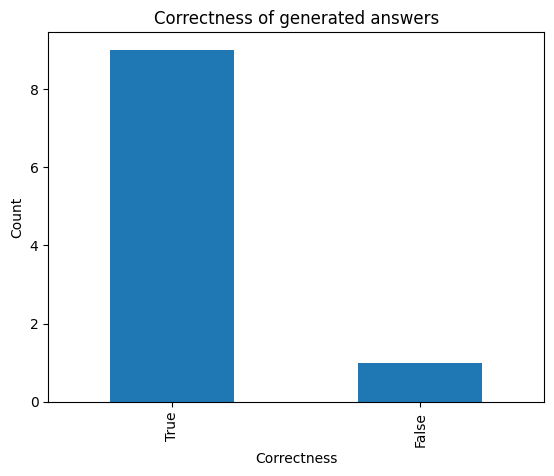

In [53]:
# How to process the log events generated by oaieval
log_name = '230315224137Q7DKEE6A_gpt-3.5-turbo_tellen-nederlands.jsonl'


events = f"/tmp/evallogs/{log_name}"

with open(events, "r") as f:
    events_df = pd.read_json(f, lines=True)

events_df

matches_df = events_df[events_df.type == "match"].reset_index(drop=True)
matches_df = matches_df.join(pd.json_normalize(matches_df.data))
matches_df.correct.value_counts().plot.bar(title="Correctness of generated answers", xlabel="Correctness", ylabel="Count")

In [54]:
# Inspect samples
for i, r in pd.json_normalize(events_df[events_df.type == "sampling"].data).iterrows():
    print(f"Prompt: {r.prompt}")
    print(f"Sampled: {r.sampled}")
    print("-" * 25)

Prompt: [{'role': 'system', 'content': 'Hierna volgen multiple choice vragen (met antwoorden) over rekenen.'}, {'role': 'user', 'content': 'Hoeveel is 4 + 5?\nA. 4\nB. 5\nC. 20\nD. 9'}]
Sampled: D. 9
-------------------------
Prompt: [{'role': 'system', 'content': 'Hierna volgen multiple choice vragen (met antwoorden) over rekenen.'}, {'role': 'user', 'content': 'Wat is het kleinste gehele getal dat groter is dan tachtig?\nA. Tien\nB. Veertien\nC. Eenentachtig\nD. Negentig'}]
Sampled: C. Eenentachtig
-------------------------
Prompt: [{'role': 'system', 'content': 'Hierna volgen multiple choice vragen (met antwoorden) over rekenen.'}, {'role': 'user', 'content': 'Hoeveel is 900 gedeeld door 15?\nA. 40\nB. 50\nC. 60\nD. 70'}]
Sampled: B. 50
-------------------------
Prompt: [{'role': 'system', 'content': 'Hierna volgen multiple choice vragen (met antwoorden) over rekenen.'}, {'role': 'user', 'content': 'Hoeveel is 305 min 12?\nA. 293\nB. 305\nC. 307\nD. 312'}]
Sampled: A. 293
----------